# Using Cardiotocography to Predict Fetal Health

### Introduction

Maternal mortality is one of the large factors of child mortalit, most of which were preventable. <br /> 
Cardiotocography(CTG) is proposed as an effective solution for preventing fetal and maternal mortality during pregnancy. <br />
CTG is recording of fetal heart rate and uterine contractions during pregnancy. <br />
For our project, we plan to test the efficiency of using CTG in predicting fetal health by checking how accurately fetal health can be predicted by CTG. <br />
Through this project, our goal is to answer the question: will fetal heart rate, acceleration and deceleration of the fetal heart rate, fetal movement, and uterine contractions be able to predict fetal health accurately? <br />
The dataset that will be used contains data extracted from CTG exams which includes features such as fetal hearth rate, fetal movement, uterine contraction, etc and recorded fetal health that is classified into 3 classes: Normal, Suspect and Pathological. <br />

### Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ dplyr   1.1.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ rec

In [2]:
# Read dataset from the web
fetal_health_data <- read_csv("https://raw.githubusercontent.com/wonha0620/dsci_100_proj/main/fetal_health.csv")
head(fetal_health_data)

Rows: 2126 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): baseline value, accelerations, fetal_movement, uterine_contraction...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,⋯,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
120,0.000,0,0.000,0.000,0,0.000,73,0.5,43,⋯,62,126,2,0,120,137,121,73,1,2
132,0.006,0,0.006,0.003,0,0.000,17,2.1,0,⋯,68,198,6,1,141,136,140,12,0,1
133,0.003,0,0.008,0.003,0,0.000,16,2.1,0,⋯,68,198,5,1,141,135,138,13,0,1
134,0.003,0,0.008,0.003,0,0.000,16,2.4,0,⋯,53,170,11,0,137,134,137,13,1,1
132,0.007,0,0.008,0.000,0,0.000,16,2.4,0,⋯,53,170,9,0,137,136,138,11,1,1
134,0.001,0,0.010,0.009,0,0.002,26,5.9,0,⋯,50,200,5,3,76,107,107,170,0,3


In [3]:
health_data_clean <- fetal_health_data |>
    select(`baseline value`:prolongued_decelerations, fetal_health) |>
    mutate(fetal_health = as_factor(fetal_health))
colnames(health_data_clean) <- gsub(" ", "_", colnames(health_data_clean))
head(health_data_clean)

baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,fetal_health
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120,0.000,0,0.000,0.000,0,0.000,2
132,0.006,0,0.006,0.003,0,0.000,1
133,0.003,0,0.008,0.003,0,0.000,1
134,0.003,0,0.008,0.003,0,0.000,1
132,0.007,0,0.008,0.000,0,0.000,1
134,0.001,0,0.010,0.009,0,0.002,3


In [4]:
set.seed(2023)
health_split <- initial_split(health_data_clean, prop=0.75, strata=fetal_health)
health_training <- training(health_split)
health_testing <- testing(health_split)

In [5]:
health_training_table <- health_training |>
    group_by(fetal_health) |>
    summarise(mean = mean(baseline_value))
health_training_table

fetal_health,mean
<fct>,<dbl>
1,132.0332
2,141.6313
3,131.3357


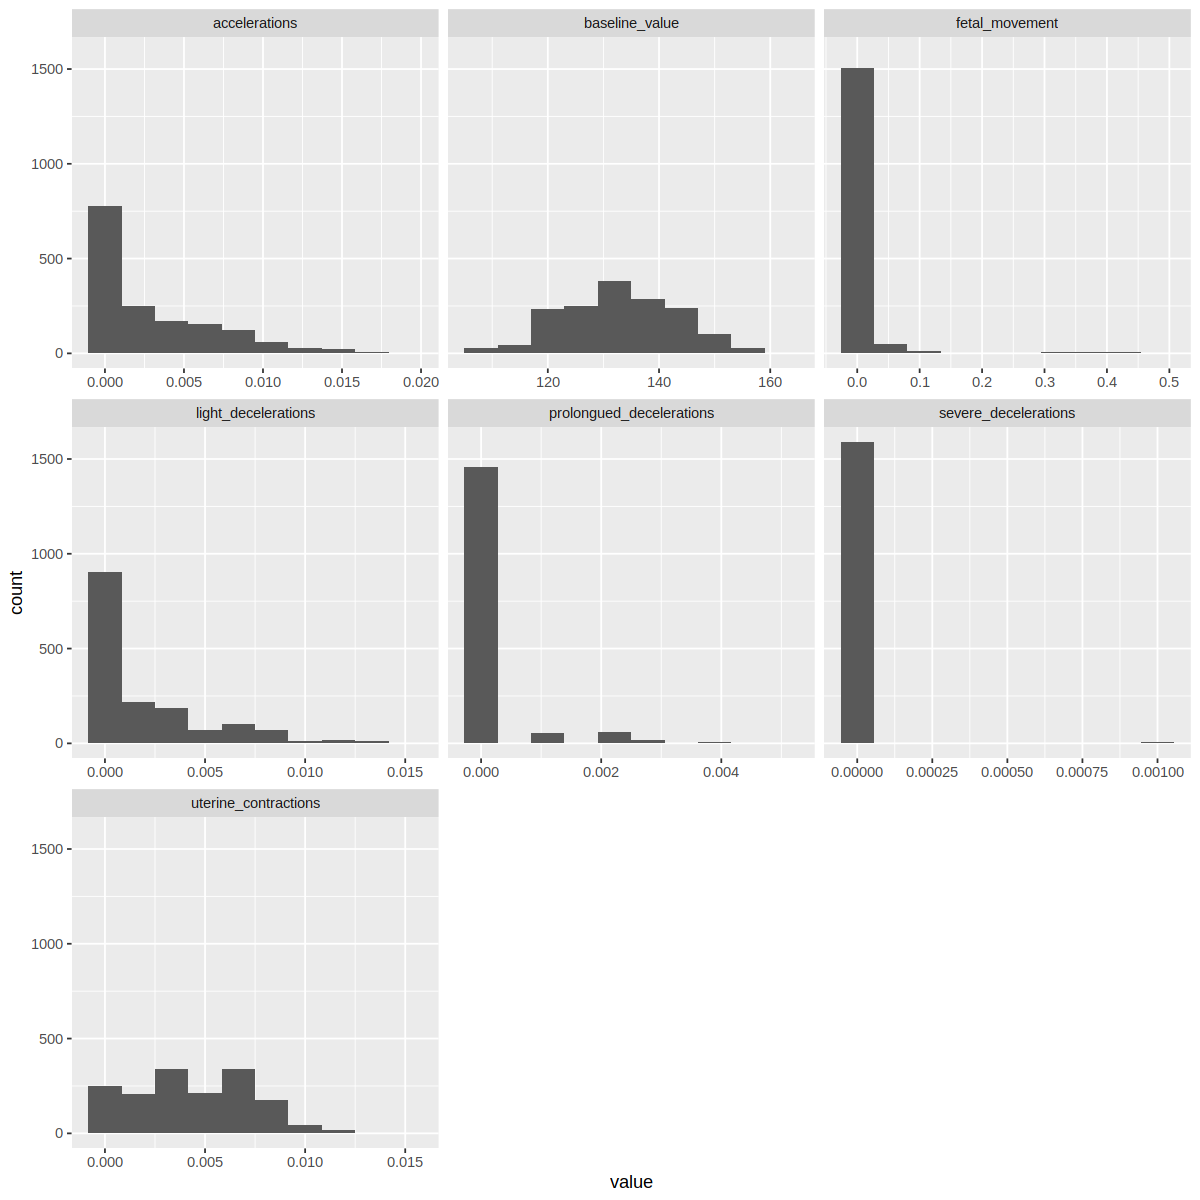

In [6]:
options(repr.plot.height = 10, repr.plot.width = 10) 
health_training_plot <- ggplot(gather((health_training |> select(-fetal_health))), aes(x=value)) +
    geom_histogram(bins = 10) +
    facet_wrap(~ key, scales="free_x")
health_training_plot

### Methods

K-nearest neighbour classification model will be used to classify fetal health based on predictors of our choice: 
* baseline value(fetal heart rate)
* accerelations 
* fetal_movement 
* light_decelerations 
* severe_decelerations 
* prolongued_declereations 
* uterine_contraction.


To visualize the result, we will create confusion matrix. Confusion matrix will allow us to identify how well our model was able to classify fetal health. Confusion matrix is an efficient visualization because recall and precision are important metrics as well as the accuracy.

### Expected outcomes and significance

This project is useful because developing a  trained model can potentially help prevent child and/or maternal death, while also allowing medical actions to be taken in time based on the predictions that are made in this model. <br />This project can also lead to future projects that could look into how the fetal health will impact the maternal health. Therefore, allowing a more accurate prediction in the prevention of both the child and maternal mortality. 
